In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits

In [4]:
from sklearn.neural_network import MLPClassifier

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import roc_auc_score

# Загружаем набор рукописных цифр

In [7]:
digits = load_digits()

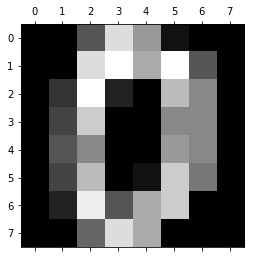

In [8]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

# Для начала научимся классифицировать 0 и 1

In [71]:
ones = digits.data[np.where(digits.target==1)[0]]

In [72]:
zeros = digits.data[np.where(digits.target==0)[0]]

In [73]:
data_set = np.concatenate([ones,zeros])

In [74]:
target = np.concatenate([np.ones((ones.shape[0],1)),np.zeros((zeros.shape[0],1))])[:,0].T

In [75]:
ids = np.arange(target.shape[0])

In [76]:
np.random.shuffle(ids)

In [18]:
data_set = data_set[ids]
target = target[ids]

### разделяем набор данных на train и test

In [19]:
train_data_set, test_data_set, train_target, test_target = train_test_split(
    data_set, target, test_size=0.33, random_state=42)

# Создаём MLP

In [20]:
clf = MLPClassifier(solver='sgd', activation='logistic', \
                    alpha=0.001, hidden_layer_sizes=(32, 10))

Обучаем модель

In [21]:
clf.fit(train_data_set, train_target)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# Проверяем результат

In [22]:
pred = clf.predict_proba(test_data_set)

In [58]:
pred[:10]

array([[ 0.58426032,  0.41573968],
       [ 0.54792638,  0.45207362],
       [ 0.3960488 ,  0.6039512 ],
       [ 0.37595422,  0.62404578],
       [ 0.37653879,  0.62346121],
       [ 0.56554092,  0.43445908],
       [ 0.38285586,  0.61714414],
       [ 0.54507665,  0.45492335],
       [ 0.58473329,  0.41526671],
       [ 0.39246746,  0.60753254]])

In [63]:
target.shape

(360,)

In [24]:
roc_auc_score(y_score=pred[:,1], y_true=test_target)

1.0

# Задание: проверить работу сети для большего числа классов

In [30]:
target = np.concatenate([np.ones((ones.shape[0],1)),np.zeros((zeros.shape[0],1))])[:,0].T
print(target.shape[0])
print(target)

360
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [53]:
zeros = digits.data[np.where(digits.target==0)[0]]
print(zeros.shape)

(178, 64)


In [55]:
ones = digits.data[np.where(digits.target==1)[0]]
print(ones.shape)

(182, 64)


In [77]:
ids

array([343, 159, 200,  17,  24,  67, 118, 305, 173, 213, 334, 131,  85,
       125, 290, 103, 295, 216, 271, 339, 128, 121, 207, 196,  71, 344,
        82,  11, 114, 223,  94, 342, 132, 229,  41, 115, 233,  86, 176,
       279, 100, 153,   9, 101, 186,  97,  99,  90,  40, 168, 235, 172,
       236, 212, 281, 164, 329, 337, 154, 338, 198,  59,  33, 138, 355,
       226, 181, 160, 247,  74,  61,  68, 319, 272, 267, 219,  44, 194,
       250, 284, 333, 122, 245, 285, 307,   4, 227,  62, 191,  95, 350,
       321, 356,  60,  34, 309, 277, 331, 110, 297, 102,  45, 231, 136,
       190, 259,  92,  80, 221, 126, 239,  77, 119,  72, 123, 175, 165,
       133, 137, 292, 299, 174, 322, 234,  27, 282, 261,  54, 304, 269,
       162, 348, 256,  63, 300,  36, 177,  81,  13, 255, 106,  89, 204,
       273,  87, 251,  14,  42,  51, 107, 237, 341, 278, 318,   8, 352,
       254,  32,  69, 230, 262, 241,  53,  22, 146, 246, 327, 289, 224,
        25,  38, 357,  55, 325, 335, 260, 171, 317,  83, 314, 18